In [ ]:
from google.colab import files
import json
import matplotlib.pyplot as plt
import scipy.special as sci
import numpy as np
import pandas as pd
import csv
import math

def add_data(new_data, original):
  for k in new_data.keys():
    original[k] = new_data[k]
  return original

def get_points(relevant_data):
  points = [(float(k), relevant_data[k]) for k in relevant_data.keys()]
  points = sorted(points, key=lambda x :x[0])
  xs = np.array([p[0] for p in points])
  ys = np.array([np.median(p[1]) for p in points])
  l =  ys - np.array([np.quantile(p[1],0.25) for p in points])
  h = np.array([np.quantile(p[1],0.75) for p in points]) - ys
  return xs, ys, l, h

In [ ]:
uploaded = files.upload()
data0 = json.loads(str(uploaded["eval0.json"], 'utf-8'))
data1 = json.loads(str(uploaded["eval1.json"], 'utf-8'))
data2 = json.loads(str(uploaded["eval2.json"], 'utf-8'))
data3 = json.loads(str(uploaded["eval3.json"], 'utf-8'))
data4 = json.loads(str(uploaded["eval4.json"], 'utf-8'))
data5 = json.loads(str(uploaded["eval5.json"], 'utf-8'))
data6 = json.loads(str(uploaded["eval6.json"], 'utf-8'))
data7 = json.loads(str(uploaded["eval7.json"], 'utf-8'))
data8 = json.loads(str(uploaded["eval8.json"], 'utf-8'))

data = {}
data = data0
data = add_data(data1,data)
data = add_data(data2,data)
data = add_data(data3,data)
data = add_data(data4,data)
data = add_data(data5,data)
data = add_data(data6,data)
data = add_data(data7,data)
data = add_data(data8,data)

Saving eval0.json to eval0.json
Saving eval1.json to eval1.json
Saving eval2.json to eval2.json
Saving eval3.json to eval3.json
Saving eval4.json to eval4.json
Saving eval5.json to eval5.json
Saving eval6.json to eval6.json
Saving eval7.json to eval7.json
Saving eval8.json to eval8.json


# Foldable section

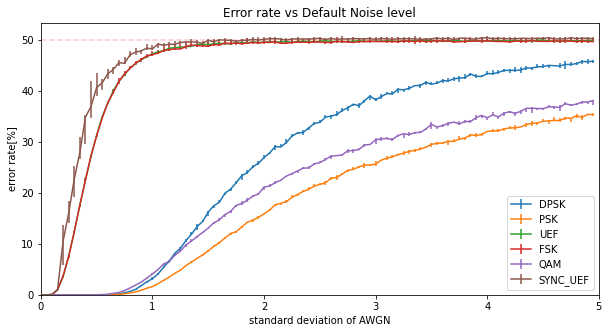

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ks = [
      'DPSKpowerVsError', 'PSKpowerVsError', 'UEFpowerVsError', 'FSKpowerVsError', 'QAMpowerVsError', 'SYNC_UEFpowerVsError'
]

for k in ks:
  relevant_data = data[k]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys*100
  l = l*100
  h = h*100
  scheme = k.split("power")[0]
  ax.errorbar(xs, ys, [l, h], label=scheme)

ax.axhline(y=50, color="red", alpha=0.20, ls="--")
ax.set_title("Error rate vs Default Noise level")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=5)
ax.legend()
fig.show()

In [ ]:
fig.savefig("errorVsNoise.pdf")
files.download("errorVsNoise.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

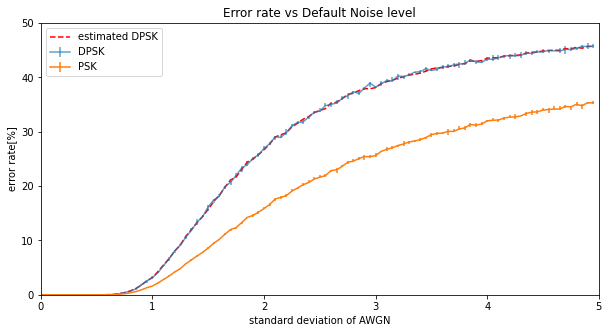

In [ ]:
def eDPSK(p):
  p = p / 100
  p = 2*p - 2*p**2
  return p*100

fig, ax = plt.subplots(figsize=(10,5))

k = "PSKpowerVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = ys*100
ys = np.array([eDPSK(y) for y in ys])
scheme = "estimated DPSK"
ax.plot(xs, ys, ls="--", label=scheme, color="red")

k = "DPSKpowerVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = 100*ys
l = l*100
h = h*100
scheme = "DPSK"
ax.errorbar(xs, ys, [l,h], label=scheme, alpha=0.7)

k = "PSKpowerVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = 100*ys
l = 100*l
h = 100*h
scheme = "PSK"
ax.errorbar(xs, ys, [l,h], label=scheme)

ax.set_title("Error rate vs Default Noise level")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=50)
ax.set_xlim(xmin=0, xmax=5)
ax.legend()
fig.show()

In [ ]:
fig.savefig("dpsk.pdf")
files.download("dpsk.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

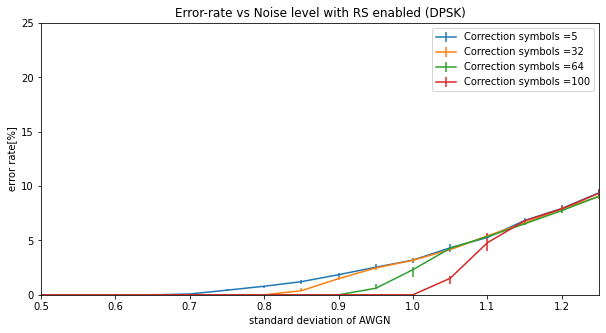

In [ ]:
ks = [k for k in data.keys() if "PowerRSVsError" in k]
schemes = list(set([k.split("|")[0] for k in ks]))

fig, ax = plt.subplots(sharex = True, figsize=(10,5))
for k in ks:
  if "PSK" not in k:
    continue


  relevant_data = data[k]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys *100
  l = l*100
  h = h*100
  
  scheme = k.split("|")[0]
  noiseLvl = k.split("|")[1]
  ax.errorbar(xs, ys, [l,h], label="Correction symbols =" + str(noiseLvl))

ax.set_title("Error-rate vs Noise level with RS enabled (" + scheme + ")")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_xlim(xmin=0.5, xmax=1.25)
ax.set_ylim(ymin=0, ymax=25)
ax.legend()

fig.show()

In [ ]:
# fig.savefig("useful.pdf")
# files.download("useful.pdf") 

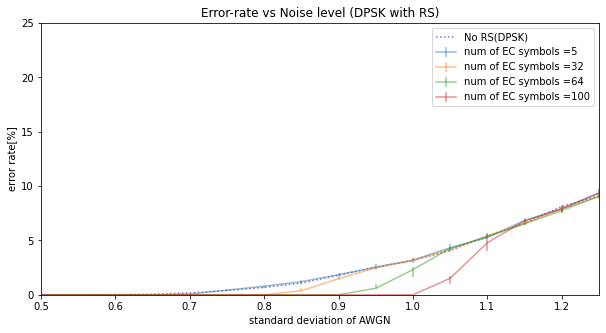

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ks = [k for k in data.keys() if ("PowerRSVsError" in k) and ("PSK" in k)]
psk_base = [k for k in data.keys() if ("powerVsError" in k) and ("PSK" in k)][0]

for k in ks:
  relevant_data = data[k]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys *100
  l = l *100
  h = h *100

  scheme = k[0:3]
  correction_symbols = k.split("|")[1]
  ax.errorbar(xs, ys, [l,h], alpha=0.5, label= "num of EC symbols =" + str(correction_symbols))

xs, ys, l, h = get_points(data[psk_base])
ys = ys * 100
ax.plot(xs, ys, ls="dotted", label="No RS(DPSK)")
ax.set_title("Error-rate vs Noise level (DPSK with RS)")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=25)
ax.set_xlim(xmin=0.5, xmax=1.25)
ax.legend()
fig.show()

In [ ]:
fig.savefig("RS.pdf")
files.download("RS.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

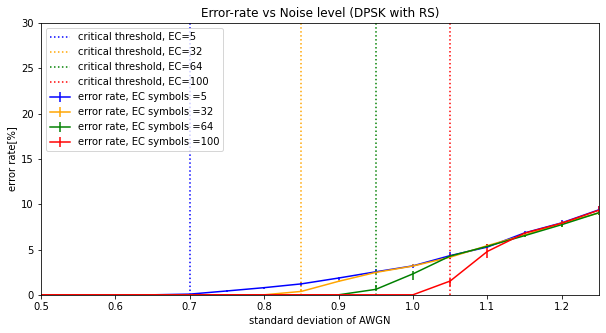

In [ ]:
def crit(t):
  t=int(t)
  psk_base = [k for k in data.keys() if ("powerVsError" in k) and ("PSK" in k)][0]
  xs, ys, l, h = get_points(data[psk_base])
  
  critV = t / (255*8)
  crit = np.argmax(ys > critV)
  return xs[crit-1]


fig, ax = plt.subplots(figsize=(10,5))

k="DPSK|5|PowerRSVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = ys *100
l = l *100
h = h*100
correction_symbols = k.split("|")[1]
ax.errorbar(xs, ys, [l,h], label= "error rate, EC symbols =" + str(correction_symbols), color="blue")
ax.vlines(crit(correction_symbols), 
          ymin=0, ymax=30, ls="dotted", 
          label="critical threshold, EC=" + str(correction_symbols), color="blue")

k="DPSK|32|PowerRSVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = ys *100
l = l *100
h = h*100
correction_symbols = k.split("|")[1]
ax.errorbar(xs, ys, [l,h], label= "error rate, EC symbols =" + str(correction_symbols), color="orange")
ax.vlines(crit(correction_symbols), 
          ymin=0, ymax=30, ls="dotted", 
          label="critical threshold, EC=" + str(correction_symbols), color="orange")

k="DPSK|64|PowerRSVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = ys *100
l = l *100
h = h*100
correction_symbols = k.split("|")[1]
ax.errorbar(xs, ys, [l,h], label= "error rate, EC symbols =" + str(correction_symbols), color="green")
ax.vlines(crit(correction_symbols), 
          ymin=0, ymax=30, ls="dotted", 
          label="critical threshold, EC=" + str(correction_symbols), color="green")

k="DPSK|100|PowerRSVsError"
relevant_data = data[k]
xs, ys, l, h = get_points(relevant_data)
ys = ys *100
l = l *100
h = h*100
correction_symbols = k.split("|")[1]
ax.errorbar(xs, ys, [l,h], label= "error rate, EC symbols =" + str(correction_symbols), color="red")
ax.vlines(crit(correction_symbols), 
          ymin=0, ymax=30, ls="dotted", 
          label="critical threshold, EC=" + str(correction_symbols), color="red")

ax.set_title("Error-rate vs Noise level (DPSK with RS)")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=30)
ax.set_xlim(xmin=0.5, xmax=1.25)
ax.legend(loc="upper left")
fig.show()

In [ ]:
fig.savefig("critThreshold.pdf")
files.download("critThreshold.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

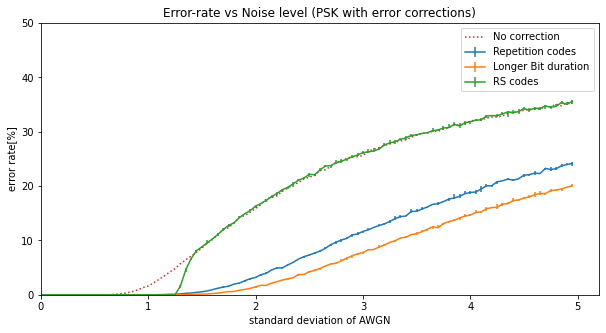

In [ ]:
def plot(k, kl):
  relevant_data = data[k]
  xs, ys, l ,h = get_points(relevant_data)
  ys = ys *100
  l = l *100
  h = h *100
  correction_symbols = k.split("|")[1]
  ax.errorbar(xs, ys, [l,h], label=kl)


fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,5))

k = "PSK|5|CorrectionVsErrorRepets"
kl = "Repetition codes"
plot(k,kl)

k = "PSK|5|CorrectionVsErrorCycles"
kl = "Longer Bit duration"
plot(k,kl)

k = "PSK|204|CorrectionVsErrorRS"
kl = "RS codes"
plot(k,kl)

k = "PSKpowerVsError"
xs, ys, l, h = get_points(data[k])
ys = ys * 100
ax.plot(xs, ys, ls="dotted", label="No correction")

ax.set_title("Error-rate vs Noise level (PSK with error corrections)")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=50)
ax.set_xlim(xmin=0)
ax.legend()

fig.show()

In [ ]:
fig.savefig("EC.pdf")
files.download("EC.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

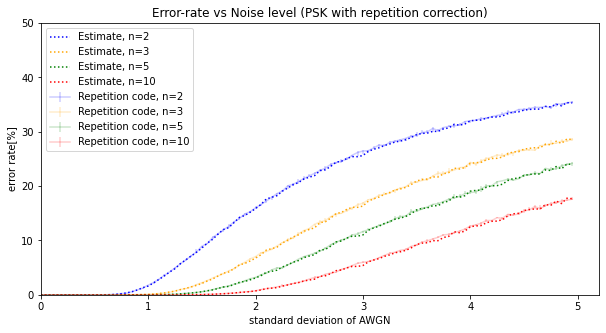

In [ ]:
k = "PSKpowerVsError"
xs, ys, l, h = get_points(data[k])
oys = ys * 100

def estim(y, n):
  p0 = y / 100
  p = 0
  if (n%2 == 0):
    n = n-1
  
  for i in range(math.ceil(n/2), n+1):
    p += sci.comb(n, i) * (p0**i) * ((1-p0)**(n - i))
  return p*100


def plot(n, c):
  # k = "PSK|" + str(n) + "|CorrectionVsErrorCycles"
  # relevant_data = data[k]
  # xs, ys = get_points(relevant_data)
  # ys = ys *100
  # ax.plot(xs, ys, color=c, label="Longer Bit duration, n=" + str(n))

  k = "PSK|" + str(n) + "|CorrectionVsErrorRepets"
  relevant_data = data[k]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys *100
  l = l*100
  h = h*100
  ax.errorbar(xs, ys, [l,h], color=c, alpha=0.2, label="Repetition code, n=" + str(n))

  ys = np.array([estim(y, n) for y in oys])
  ax.plot(xs, ys, color=c, linestyle="dotted", label="Estimate, n=" + str(n))

fig, ax = plt.subplots(figsize=(10,5))
plot(2, "blue")
plot(3, "orange")
plot(5, "green")
plot(10, "red")

ax.set_title("Error-rate vs Noise level (PSK with repetition correction)")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=50)
ax.set_xlim(xmin=0)
ax.legend()
fig.show()

In [ ]:
fig.savefig("ECRepets.pdf")
files.download("ECRepets.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

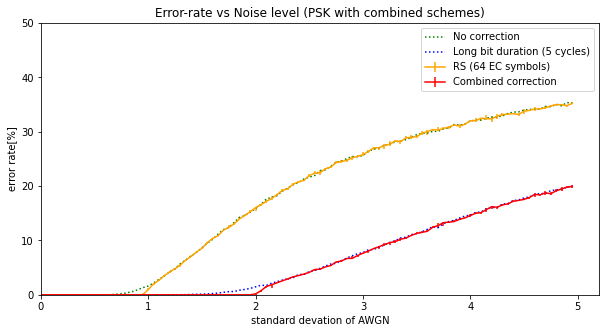

In [ ]:
def plot(k, l, c, s="-"):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  ys = ys *100
  ll = ll*100
  h = h*100
  if (s == "-"):
    ax.errorbar(xs, ys, [ll,h], label=l, ls=s, color=c)
  else:
    ax.plot(xs, ys, label=l, ls=s, color=c)

fig, ax = plt.subplots(figsize=(10,5))

k = "Combined|RS|powerVsError"
l = "RS (64 EC symbols)"
plot(k, l, "orange")

k = "PSKpowerVsError"
l = "No correction"
plot(k, l, "green", "dotted")

k = "Combined|powerVsError"
l = "Combined correction"
plot(k, l, "red")

k = "PSK|5|CorrectionVsErrorCycles"
l = "Long bit duration (5 cycles)"
plot(k, l, "blue", "dotted")

ax.set_title("Error-rate vs Noise level (PSK with combined schemes)")
ax.set_xlabel("standard devation of AWGN")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=50)
ax.set_xlim(xmin=0)
ax.legend()
fig.show()

In [ ]:
fig.savefig("combined.pdf")
files.download("combined.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

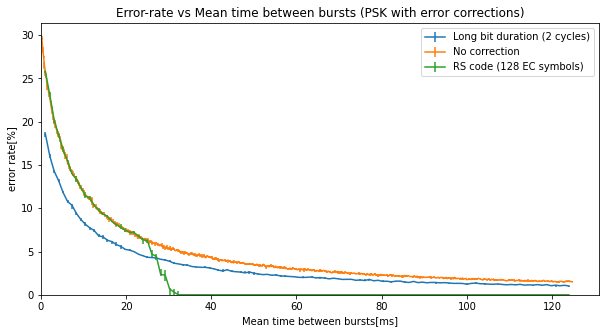

In [ ]:
def plot(k, l):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  xs = xs / 48
  ys = ys *100
  ll = ll *100
  h = h *100
  ax.errorbar(xs, ys, [ll,h], label=l)

fig, ax = plt.subplots(figsize=(10,5))

k="PSK|320|BurstCyclesVsError"
l="Long bit duration (2 cycles)"
plot(k,l)

k="PSK|320|BurstVsError"
l="No correction"
plot(k,l)

k="PSK|128|320|BurstRSVsError"
l="RS code (128 EC symbols)"
plot(k,l)

ax.set_title("Error-rate vs Mean time between bursts (PSK with error corrections)")
ax.set_xlabel("Mean time between bursts[ms]")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.legend()
fig.show()

In [ ]:
fig.savefig("burst.pdf")
files.download("burst.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

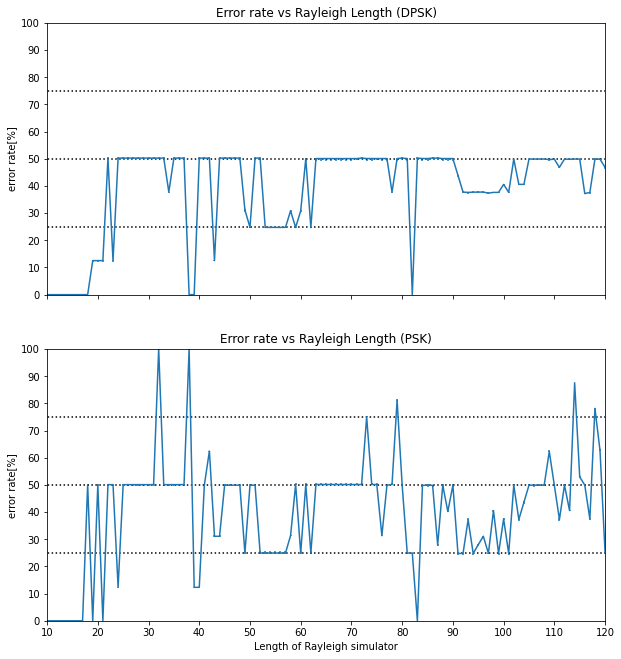

In [ ]:
ks = [k for k in data.keys() if "RayleighVsError" in k and "|" not in k]

count = 2
fig, axs = plt.subplots(count, 1, figsize=(10,5.5*count), sharex=True)

for i in range(count):
  k = ks[i]
  ax = axs[i]
  relevant_data = data[k]
  scheme = k.split("Ray")[0]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys * 100
  l = l *100
  h = h*100
  ax.errorbar(xs, ys, [l, h])
  ax.set_title("Error rate vs Rayleigh Length (" + scheme + ")")
  ax.set_ylabel("error rate[%]")
  xmax=120
  ax.hlines(50, xmin=0, xmax=xmax, linestyle="dotted")
  ax.hlines(75, xmin=0, xmax=xmax, linestyle="dotted")
  ax.hlines(25, xmin=0, xmax=xmax, linestyle="dotted")

  ax.set_ylim(ymin=0, ymax=100)
  ax.yaxis.set_ticks(np.arange(0, 101, 10))
  ax.set_xlim(xmin=10, xmax=xmax)
  ax.xaxis.set_ticks(np.arange(10, xmax+1, 10))

axs[count-1].set_xlabel("Length of Rayleigh simulator")
fig.show()

In [ ]:
fig.savefig("rayleigh1.pdf")
files.download("rayleigh1.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

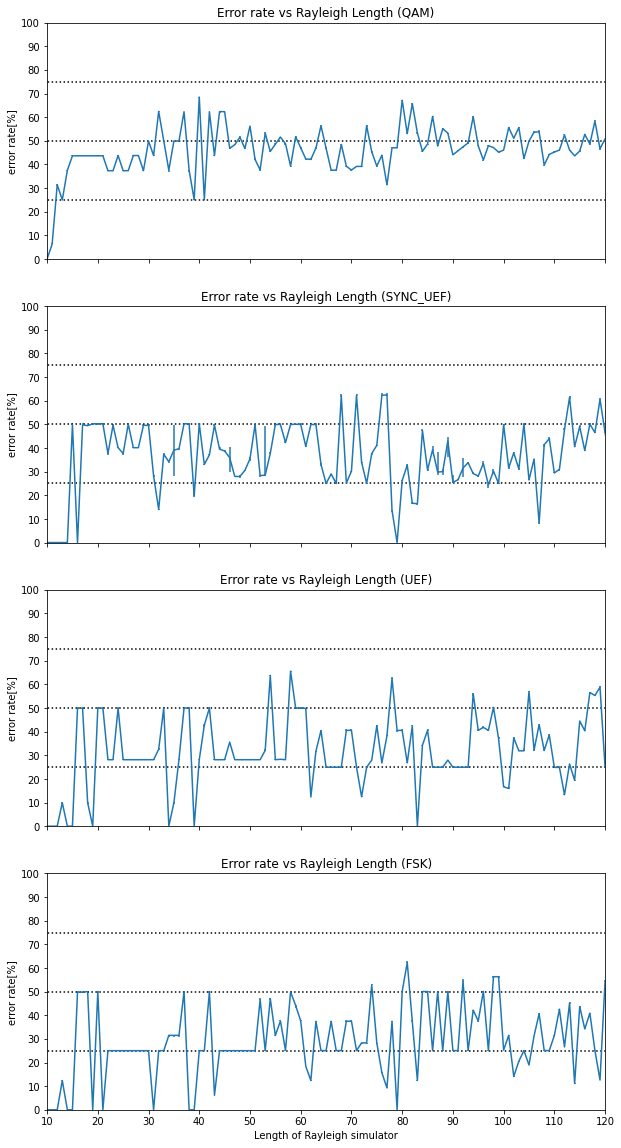

In [ ]:
ks = [k for k in data.keys() if "RayleighVsError" in k and "|" not in k]

count = 4
fig, axs = plt.subplots(count, 1, figsize=(10,5*count), sharex=True)

for i in range(6-count, 6):
  k = ks[i]
  ax = axs[i-count]
  relevant_data = data[k]
  scheme = k.split("Ray")[0]
  xs, ys, l, h = get_points(relevant_data)
  ys = ys * 100
  l = l *100
  h = h*100
  ax.errorbar(xs, ys, [l, h])
  ax.set_title("Error rate vs Rayleigh Length (" + scheme + ")")
  ax.set_ylabel("error rate[%]")
  xmax=120
  ax.hlines(50, xmin=0, xmax=xmax, linestyle="dotted")
  ax.hlines(75, xmin=0, xmax=xmax, linestyle="dotted")
  ax.hlines(25, xmin=0, xmax=xmax, linestyle="dotted")

  ax.set_ylim(ymin=0, ymax=100)
  ax.yaxis.set_ticks(np.arange(0, 101, 10))
  ax.set_xlim(xmin=10, xmax=xmax)
  ax.xaxis.set_ticks(np.arange(10, xmax+1, 10))

axs[count-1].set_xlabel("Length of Rayleigh simulator")
fig.show()

In [ ]:
fig.savefig("rayleigh2.pdf")
files.download("rayleigh2.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

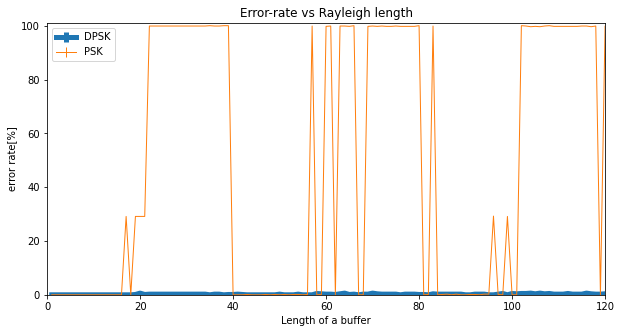

In [ ]:
def plot(k, l, w=1):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  xs = xs
  ys = ys *100
  ll = ll *100
  h = h *100
  ax.errorbar(xs, ys, [ll,h], label=l, linewidth=w)

ks = [k for k in data.keys() if "StaticRayleighVsError" in k]

fig, ax = plt.subplots(figsize=(10,5))

# k="FSK|StaticRayleighVsError"
# l="FSK"
# plot(k, l, 5)

k="DPSK|StaticRayleighVsError"
l="DPSK"
plot(k, l, 5)

k="PSK|StaticRayleighVsError"
l="PSK"
plot(k, l)


ax.set_title("Error-rate vs Rayleigh length")
ax.set_xlabel("Length of a buffer")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=101)
ax.set_xlim(xmin=0, xmax=120)
ax.legend()
fig.show()

In [ ]:
fig.savefig("staticRay.pdf")
files.download("staticRay.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

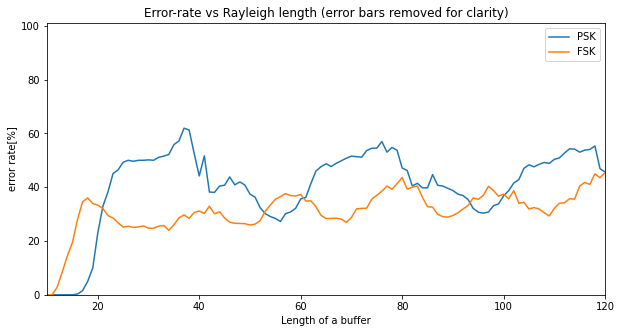

In [ ]:
def plotable(scheme):
  d = {}
  for i in range(1,200):
    d[i] = []

  for i in range(100):
    k = scheme+"|"+str(i)+"|RayleighVsError"
    ls = data[k]
    for l in ls.keys():
      d[int(l)] = d[int(l)] + ls[l]
  
  xs = np.array(list(d.keys()))
  ys = np.array([np.average(y) for y in d.values()])
  l = ys - np.array([np.quantile(y, 0.25) for y in d.values()])
  h = np.array([np.quantile(y, 0.75) for y in d.values()]) - ys
  return xs,ys, l, h

def plot(xs, ys, ll, h, l):
  ys = ys*100
  ll = ll*100
  h = h*100
  #ax.errorbar(xs, ys, [ll,h], label=l)
  ax.plot(xs, ys, label=l)

fig, ax = plt.subplots(figsize=(10,5))

scheme = "PSK"
xs, ys, l, h = plotable(scheme)
plot(xs, ys, l, h, scheme)

scheme = "FSK"
xs, ys, l, h = plotable(scheme)
plot(xs, ys, l, h, scheme)

ax.set_title("Error-rate vs Rayleigh length (error bars removed for clarity)")
ax.set_xlabel("Length of a buffer")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=101)
ax.set_xlim(xmin=10, xmax=120)
ax.legend()
fig.show()

In [ ]:
fig.savefig("avgRay.pdf")
files.download("avgRay.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

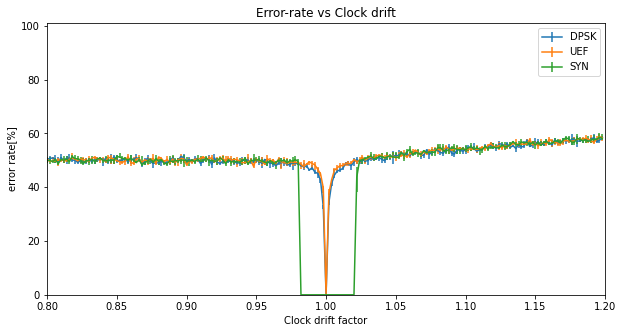

In [ ]:
def plot(k, l):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  ys = ys *100
  ll = ll *100
  h = h *100
  ax.errorbar(xs, ys, [ll,h], label=l)

ks = [k for k in data.keys() if "ClockDriftVsError" in k]

fig, ax = plt.subplots(figsize=(10,5))

plot("DPSK|0.0|ClockDriftVsError", "DPSK")
plot("UEF|0.0|ClockDriftVsError", "UEF")
plot("SYNC_UEF|0.0|ClockDriftVsError", "SYN")

ax.set_title("Error-rate vs Clock drift")
ax.set_xlabel("Clock drift factor")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=101)
ax.set_xlim(xmin=0.8, xmax=1.2)
ax.legend()
fig.show()

In [ ]:
fig.savefig("drift.pdf")
files.download("drift.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

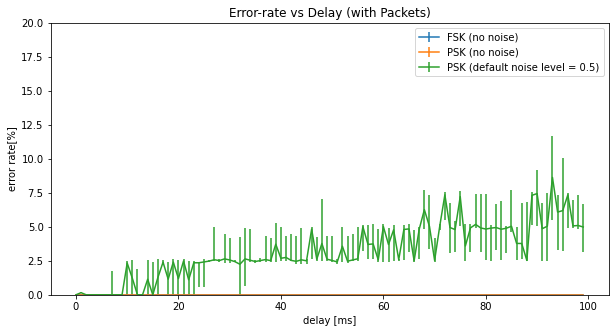

In [ ]:
def plot(k, l, w=1):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  xs = xs *1000
  ys = ys *100
  ll = ll *100
  h = h *100
  ax.errorbar(xs, ys, [ll,h], label=l)

fig, ax = plt.subplots(figsize=(10,5))

plot("FSK|PacketDelayVsError", "FSK (no noise)", 5)
plot("PSK|PacketDelayVsError", "PSK (no noise)", 5)
plot("PSK|0.5|PacketDelayNoiseVsError", "PSK (default noise level = 0.5)")

ax.set_title("Error-rate vs Delay (with Packets)")
ax.set_xlabel("delay [ms]")
ax.set_ylabel("error rate[%]")
ax.set_ylim(ymin=0, ymax=20)
ax.legend()
fig.show()

In [ ]:
fig.savefig("packetDelay.pdf")
files.download("packetDelay.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

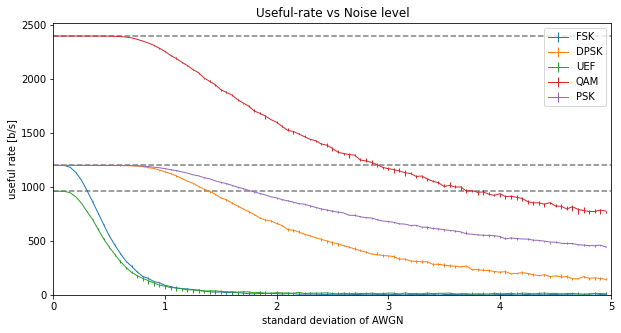

In [ ]:
def plot(k, l, w=1):
  relevant_data = data[k]
  xs, ys, ll, h = get_points(relevant_data)
  ys = ys
  ll = ll
  h = h
  ax.errorbar(xs, ys, [ll,h], label=l, linewidth=w)

fig, ax = plt.subplots(figsize=(10,5))

ks = [k for k in data.keys() if "powerVsUseful" in k]
for k in ks:
  scheme = k.split("pow")[0]
  plot(k, scheme)

ax.hlines(2400, xmin=0, xmax=5, ls="--", alpha=0.5)
ax.hlines(1200, xmin=0, xmax=5, ls="--", alpha=0.5)
ax.hlines(1200*0.8, xmin=0, xmax=5, ls="--", alpha=0.5)

ax.set_title("Useful-rate vs Noise level")
ax.set_xlabel("standard deviation of AWGN")
ax.set_ylabel("useful rate [b/s]")
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=5)
ax.legend()
fig.show()

In [ ]:
fig.savefig("useful.pdf")
files.download("useful.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Section break